# Behavioural statistics

Here we will look at behaviours of object exploration, how long the animal explores each objects in the different positions. The idea is to use this information to later analyze neural activity in relation to that.

Take into account that in the behaviour files we consider that there was an object exploratory behaviour if the mouse was arroung the object for more that 20 frames (2 seconds).

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
import scipy
cmap = cm.jet

In [5]:
mouse = 56165        ### mouse number id
session_now =1              ## session that will run

re_sf = 20
fixed = 'None'
## define task for plotting. This will cahnge for other mice!!!!
if mouse == 56165 or mouse == 32364:
    if mouse == 56165:
        sessions = [1,2,4]       ## sessions for this particular mouse
    if mouse == 32364:
        sessions = [1,2]
    if session_now == 1:
        task = 'OVERLAPPING'
        if mouse == 32364:
            fixed = 'LR'
        if mouse == 56165:
            fixed = 'UR'
    else:
        if session_now == 2:
            task = 'STABLE'
        else:
            task = 'RANDOM'
            
if mouse == 32365:
    sessions = [2,3] ## sessions for this particular mouse
    if session_now == 2:
        task = 'RANDOM'
    else:
        if session_now == 3:
            task = 'OVERLAPPING'
            fixed = 'LR'
            
if mouse == 56166:
    sessions = [1,2] ## sessions for this particular mouse
    if session_now == 1:
        task = 'RANDOM'
    else:
        if session_now == 2:
            task = 'OVERLAPPING'
            fixed = 'UR'
            
if mouse == 32366:
    sessions = [2,3] ## sessions for this particular mouse
    if session_now == 3:
        task = 'RANDOM'
            
if mouse == 32363:
    sessions = [1,2] ## sessions for this particular mouse
    if session_now == 1:
        task = 'RANDOM'
    else:
        if session_now == 2:
            task = 'OVERLAPPING'
            fixed = 'UL'

In [6]:
behaviour_dir = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/scoring_time_vector/'
objects_dir= os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/object_positions/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/data/process/figures/exploratory_behaviour/'
timeline_file_dir = os.environ['PROJECT_DIR'] + 'neural_analysis/data/timeline/'

In [7]:
session = session_now
beh_file_name_1 = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_event_' + f'{re_sf}' + '.npy'

In [8]:
## LOAD BEHAVIOUR
behaviour = np.load(behaviour_dir + beh_file_name_1)
#c = np.linspace(0, 20, len(behaviour))
#reshape_behaviour = np.reshape(behaviour[:int(int(behaviour.shape[0]/re_sf)*re_sf)],(int(behaviour.shape[0]/re_sf),re_sf))
#resample_beh1 = np.reshape(scipy.stats.mode(reshape_behaviour,axis=1)[0],reshape_behaviour.shape[0])
labels = [' ', 'rest','NE', 'LL', 'LR', 'UR', 'UL']

## LOAD ENVIRONMENTAL CONDITIONS
condition_objects_file = objects_dir + 'condition_vector_mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
condition_vector = np.load(condition_objects_file)

## LOAD TIMELINE
time_file_session_1 =  'mouse_'+ f'{mouse}'+'_session_'+ f'{session}' +'_trial_1_v'+ f'{1}'+'.4.'+f'{1}'+\
                          '.'+f'{0}'+ '.pkl'

timeline_file= open(timeline_file_dir + time_file_session_1,'rb')
timeline_info = pickle.load(timeline_file)
timeline_1 = np.zeros(len(timeline_info) + 1)
for i in range(len(timeline_info)):
    timeline_1[i] = timeline_info[i][1]
timeline_1[len(timeline_info)] = behaviour.shape[0]
timeline = timeline_1/re_sf
time_lenght = 32

In [9]:
behavioural_matrix = np.zeros((4,42))
for i in range(time_lenght):
    for target in [2,3,4,5]:
        position_events = np.where(behaviour[int(timeline_1[i]):int(timeline_1[i+1])] == target)[0]
        behavioural_matrix[target-2,i] = len(position_events)/10

behavioural_number = np.zeros((4,42))
for trial in range(time_lenght):
    short_vector = behaviour[int(timeline_1[trial]):int(timeline_1[trial+1])]
    events_list = []
    events_counter_list = []
    start_counter = 100
    counter = 0
    for i in range(len(short_vector)):
        if short_vector[i] != start_counter:
            events_list.append(start_counter)
            events_counter_list.append(counter)
            start_counter = short_vector[i]
            counter = 1
        else:
            counter = counter + 1
    events = np.array(events_list)
    events_counter = np.array(events_counter_list)           #counter in frames un the original sampling rate
    for target in [2,3,4,5]:
        position_events = np.where(events == target)[0]
        behavioural_number[target-2,trial] = len(position_events)


/home/melisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/home/melisa/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  func(*args, **kwargs)
/home/melisa/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constra

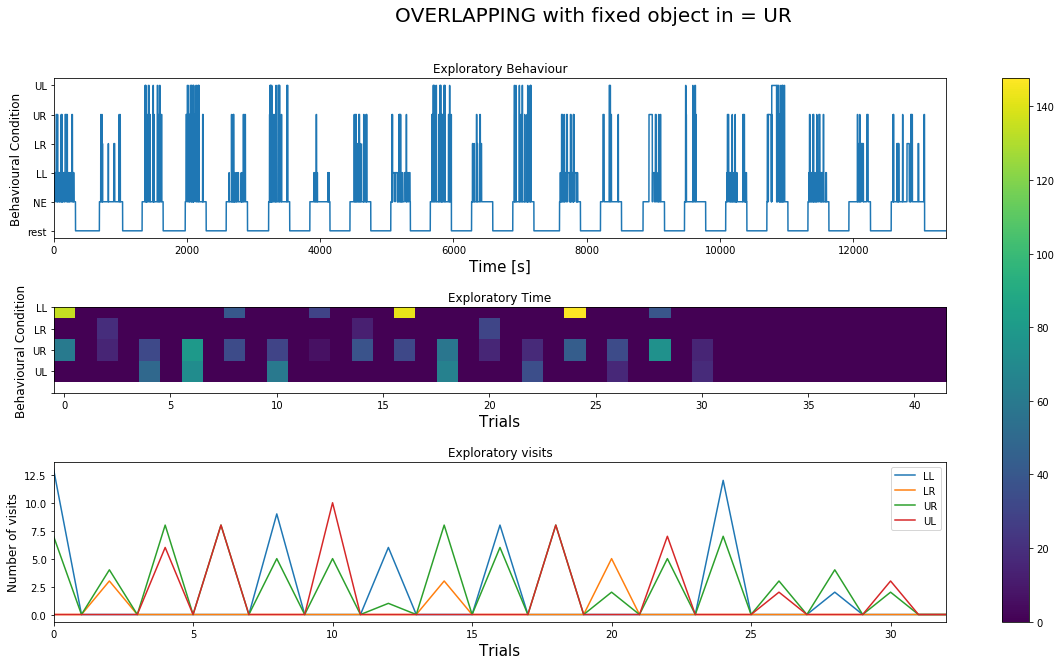

In [10]:
figure = plt.figure(constrained_layout=True)
gs = plt.GridSpec(3, 1)
axes1 = figure.add_subplot(gs[0, 0])
axes1.plot(np.arange(0,len(behaviour))/10,behaviour)
axes1.set_yticklabels(labels)
axes1.set_xlabel('Time [s]', fontsize = 15)
axes1.set_xlim([0,len(behaviour)/10])
axes1.set_ylabel('Behavioural Condition', fontsize = 12)
axes1.set_title('Exploratory Behaviour')

#axes[1].imshow(behavioural_matrix)
#figure.colorbar(behavioural_matrix, ax = axes[0:2])

conditions = [ 'LL', 'LR', 'UR', 'UL', ' ']
axes2 = figure.add_subplot(gs[1, 0])
x = axes2.imshow(behavioural_matrix)
axes2.set_yticks(np.arange(len(conditions)))
axes2.set_yticklabels(conditions)
axes2.set_xlabel('Trials', fontsize = 15)
axes2.set_ylabel('Behavioural Condition', fontsize = 12)
axes2.set_title('Exploratory Time')

#figure.colorbar(x, ax =axes2)

axes3 = figure.add_subplot(gs[2, 0])
axes3.plot(behavioural_number.T)
#axes3.set_yticks(np.arange(len(conditions)))
#axes3.set_yticklabels(conditions)
axes3.set_xlabel('Trials', fontsize = 15)
axes3.set_ylabel('Number of visits', fontsize = 12)
axes3.legend(conditions)
axes3.set_xlim([0,time_lenght])
axes3.set_title('Exploratory visits')


#figure.colorbar(x, ax = axes3)

figure.colorbar(x, ax =[axes1,axes2,axes3])
figure.suptitle(task + ' with fixed object in = ' + fixed, fontsize = 20)
figure.set_size_inches(20,10)
figure_name = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_event_' + f'{re_sf}' + '_exploratory_vector.png'
figure.savefig(figure_path + figure_name)

In [11]:
events_list = []
events_counter_list = []
start_counter = 100
counter = 0
for i in range(behaviour.shape[0]):
    if behaviour[i] != start_counter:
        events_list.append(start_counter)
        events_counter_list.append(counter)
        start_counter = behaviour[i]
        counter = 1
    else:
        counter = counter + 1

/home/melisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  app.launch_new_instance()


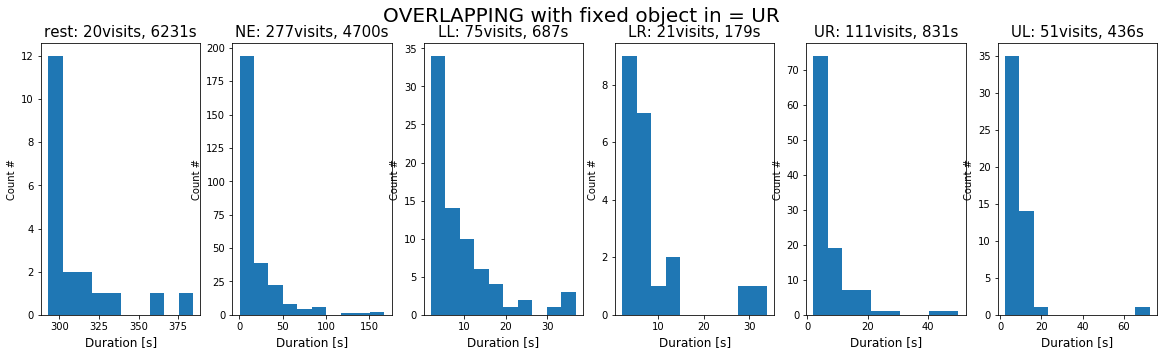

In [12]:
fig = plt.figure(constrained_layout=True)
gs = plt.GridSpec(1, 6)
events = np.array(events_list)
events_counter = np.array(events_counter_list)           #counter in frames un the original sampling rate
for target in [0,1,2,3,4,5]:
    position_events = np.where(events == target)[0]
    events_duration = events_counter[position_events]/10   # convert to seconds
    ax = fig.add_subplot(gs[0, target])
    ax.hist(events_duration)
    ax.set_title(labels[target+1] +': '+ f'{len(position_events)}' +'visits, ' + f'{int(sum(events_duration))}' + 's' ,fontsize = 15)
    ax.set_xlabel('Duration [s]',fontsize = 12)
    ax.set_ylabel('Count #')
fig.suptitle(task + ' with fixed object in = ' + fixed, fontsize = 20)
fig.set_size_inches(20, 5)
figure_name = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_event_' + f'{re_sf}' + '_exploratory_statistics.png'
fig.savefig(figure_path + figure_name)



In [31]:
# create exploration events vectors that are shorter or longer that 15s

limit = 150 # 200 frames = 15 s
behaviour_short_events = np.zeros(behaviour.shape)
behaviour_long_events = np.zeros(behaviour.shape)

start = 0
for i in range(len(events)):
    if events_counter[i] < limit:
        behaviour_short_events[int(start):int(start+events_counter[i])] = events[i]
    else:
        behaviour_long_events[int(start):int(start+events_counter[i])] = events[i]
    start = start + events_counter[i]


In [32]:
beh_file_short = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_event_' + f'{re_sf}' + '_short.npy'
beh_file_long = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_event_' + f'{re_sf}' + '_long.npy'

np.save(behaviour_dir + beh_file_short,behaviour_short_events)
np.save(behaviour_dir + beh_file_long,behaviour_long_events)

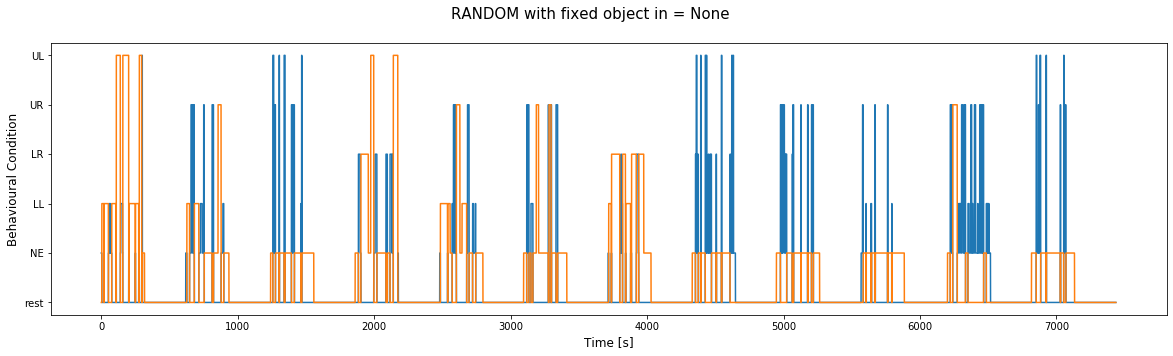

In [33]:
figure, axes = plt.subplots(1)
axes.plot(np.arange(0,len(behaviour))/10,behaviour_short_events)
axes.plot(np.arange(0,len(behaviour))/10,behaviour_long_events)
#axes.plot(np.arange(0,len(behaviour))/10,behaviour)
axes.set_yticklabels(labels)
axes.set_xlabel('Time [s]', fontsize = 12)
axes.set_ylabel('Behavioural Condition', fontsize = 12)
figure.suptitle(task + ' with fixed object in = ' + fixed, fontsize = 15)
figure.set_size_inches(20,5)
figure_name = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_event_' + f'{re_sf}' + '_exploratory_lenght.png'
figure.savefig(figure_path + figure_name)
